In [1]:
import os
import datetime

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense

In [4]:
df=pd.read_csv('life_expectancy.csv')

In [5]:
df.shape

(2938, 22)

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.shape

(2938, 22)

In [9]:
#Dropping all Null Values from the Dataframe

df=df.dropna()

In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
df.shape

(1649, 22)

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt

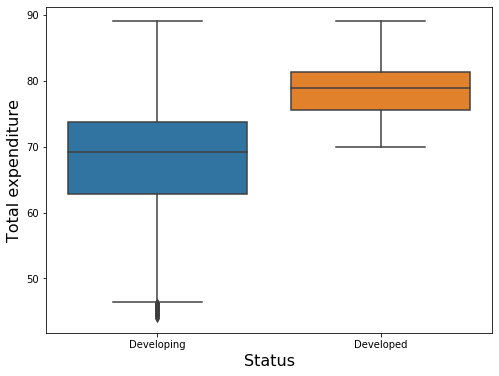

In [14]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Life expectancy ', data = df)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)

plt.show()

In [15]:
df_corr = df[['Life expectancy ', 
                  'Adult Mortality', 
                  'Total expenditure', 
                  'Diphtheria ', 
                  'GDP',
                  'Population']].corr()
df_corr

,Life expectancy,Adult Mortality,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.702523,0.174718,0.341331,0.441322,-0.022305
Adult Mortality,-0.702523,1.000000,-0.085227,-0.191429,-0.255035,-0.015012
Total expenditure,0.174718,-0.085227,1.000000,0.129915,0.180373,-0.079962
Diphtheria,0.341331,-0.191429,0.129915,1.000000,0.158438,-0.039898
GDP,0.441322,-0.255035,0.180373,0.158438,1.000000,-0.020369
Population,-0.022305,-0.015012,-0.079962,-0.039898,-0.020369,1.000000


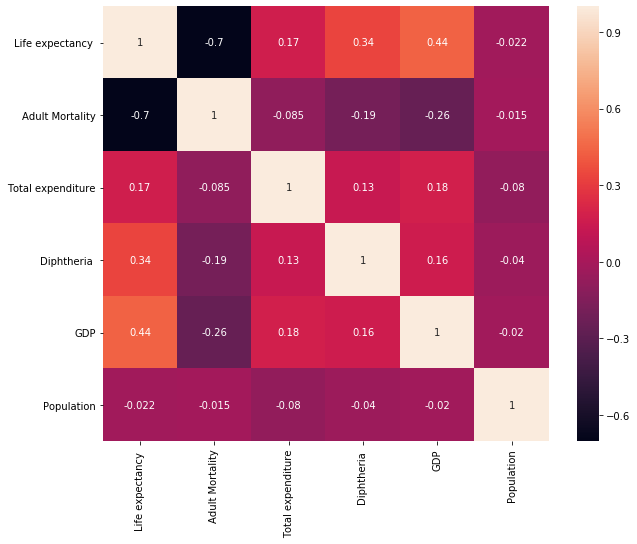

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(df_corr, annot=True)

plt.show()

In [17]:
X=df.drop('Life expectancy ',axis=1)

In [18]:
y=df['Life expectancy ']

In [19]:
X.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
X.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [21]:
X=X.drop('Country',axis=1)

In [22]:
X.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
categorical_col= X['Status'].copy()

In [24]:
categorical_col

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
5       Developing
6       Developing
7       Developing
8       Developing
9       Developing
10      Developing
11      Developing
12      Developing
13      Developing
14      Developing
15      Developing
16      Developing
17      Developing
18      Developing
19      Developing
20      Developing
21      Developing
22      Developing
23      Developing
24      Developing
25      Developing
26      Developing
27      Developing
28      Developing
29      Developing
           ...    
2853    Developing
2854    Developing
2855    Developing
2856    Developing
2857    Developing
2907    Developing
2908    Developing
2909    Developing
2910    Developing
2911    Developing
2912    Developing
2913    Developing
2914    Developing
2915    Developing
2916    Developing
2923    Developing
2924    Developing
2925    Developing
2926    Developing
2927    Developing
2928    Developing
2929    Deve

In [25]:
categorical_col.nunique()

2

In [26]:
X.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
#One Hot Encoding for the Status Column

categorical_col=pd.get_dummies(categorical_col)
categorical_col.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
X=X.drop('Status',axis=1)

In [29]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
X.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [31]:
#Adding the One hot encoded colms in the Dataframe

final_X=pd.concat([X,categorical_col],axis=1,sort=False)

In [32]:
final_X.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [33]:
final_X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [34]:
final_X.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [35]:
final_X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(final_X,y,test_size=0.30,random_state=1)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1154, 21), (495, 21), (1154,), (495,))

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:
def Single_layer_model():
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(32, 
                                    input_shape = (X_train.shape[1],), 
                                    activation = 'sigmoid'))

    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss = 'mse', 
                  metrics = ['mae', 'mse'], 
                  optimizer = optimizer)

    return model

In [40]:
model = Single_layer_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


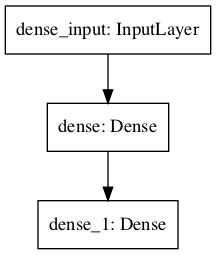

In [41]:
tf.keras.utils.plot_model(model)

In [42]:
num_epochs = 250

training_history = model.fit(X_train, 
                             y_train,
                             epochs = num_epochs, 
                             validation_split = 0.3, 
                             verbose = True)

Epoch 1/250
26/26 [==============================] - 1s 25ms/step - loss: 4536.5695 - mae: 66.8286 - mse: 4536.5695 - val_loss: 4016.5674 - val_mae: 62.8303 - val_mse: 4016.5674
Epoch 2/250
26/26 [==============================] - 0s 4ms/step - loss: 3803.8442 - mae: 61.2127 - mse: 3803.8442 - val_loss: 3287.0388 - val_mae: 56.8606 - val_mse: 3287.0388
Epoch 3/250
26/26 [==============================] - 0s 4ms/step - loss: 3083.8495 - mae: 55.0870 - mse: 3083.8495 - val_loss: 2532.3125 - val_mae: 49.8003 - val_mse: 2532.3125
Epoch 4/250
26/26 [==============================] - 0s 4ms/step - loss: 2310.0201 - mae: 47.5318 - mse: 2310.0201 - val_loss: 1828.9152 - val_mae: 42.1068 - val_mse: 1828.9152
Epoch 5/250
26/26 [==============================] - 0s 4ms/step - loss: 1635.5573 - mae: 39.7339 - mse: 1635.5573 - val_loss: 1252.4198 - val_mae: 34.4716 - val_mse: 1252.4198
Epoch 6/250
26/26 [==============================] - 0s 4ms/step - loss: 1114.4102 - mae: 32.3187 - mse: 1114.4102

26/26 [==============================] - 0s 4ms/step - loss: 7.9185 - mae: 2.1243 - mse: 7.9185 - val_loss: 11.7367 - val_mae: 2.4196 - val_mse: 11.7367
Epoch 50/250
26/26 [==============================] - 0s 3ms/step - loss: 8.6235 - mae: 2.1587 - mse: 8.6235 - val_loss: 11.5959 - val_mae: 2.4142 - val_mse: 11.5959
Epoch 51/250
26/26 [==============================] - 0s 3ms/step - loss: 8.8162 - mae: 2.1961 - mse: 8.8162 - val_loss: 11.3504 - val_mae: 2.3853 - val_mse: 11.3504
Epoch 52/250
26/26 [==============================] - 0s 3ms/step - loss: 8.7001 - mae: 2.1352 - mse: 8.7001 - val_loss: 11.1306 - val_mae: 2.3605 - val_mse: 11.1306
Epoch 53/250
26/26 [==============================] - 0s 3ms/step - loss: 7.8128 - mae: 2.0645 - mse: 7.8128 - val_loss: 10.9891 - val_mae: 2.3354 - val_mse: 10.9891
Epoch 54/250
26/26 [==============================] - 0s 3ms/step - loss: 7.2814 - mae: 2.0058 - mse: 7.2814 - val_loss: 11.0040 - val_mae: 2.3595 - val_mse: 11.0040
Epoch 55/250
26/2

Epoch 99/250
26/26 [==============================] - 0s 3ms/step - loss: 6.0519 - mae: 1.7799 - mse: 6.0519 - val_loss: 9.5604 - val_mae: 2.1920 - val_mse: 9.5604
Epoch 100/250
26/26 [==============================] - 0s 3ms/step - loss: 5.9470 - mae: 1.7747 - mse: 5.9470 - val_loss: 9.5044 - val_mae: 2.1686 - val_mse: 9.5044
Epoch 101/250
26/26 [==============================] - 0s 6ms/step - loss: 6.8289 - mae: 1.8353 - mse: 6.8289 - val_loss: 9.4063 - val_mae: 2.1691 - val_mse: 9.4063
Epoch 102/250
26/26 [==============================] - 0s 3ms/step - loss: 5.7001 - mae: 1.7406 - mse: 5.7001 - val_loss: 9.3997 - val_mae: 2.1682 - val_mse: 9.3997
Epoch 103/250
26/26 [==============================] - 0s 3ms/step - loss: 6.5482 - mae: 1.8496 - mse: 6.5482 - val_loss: 9.3596 - val_mae: 2.1642 - val_mse: 9.3596
Epoch 104/250
26/26 [==============================] - 0s 3ms/step - loss: 5.9473 - mae: 1.7950 - mse: 5.9473 - val_loss: 9.3023 - val_mae: 2.1609 - val_mse: 9.3023
Epoch 105/2

Epoch 149/250
26/26 [==============================] - 0s 3ms/step - loss: 4.3955 - mae: 1.4675 - mse: 4.3955 - val_loss: 7.7939 - val_mae: 1.9665 - val_mse: 7.7939
Epoch 150/250
26/26 [==============================] - 0s 3ms/step - loss: 4.7295 - mae: 1.5780 - mse: 4.7295 - val_loss: 7.5992 - val_mae: 1.9293 - val_mse: 7.5992
Epoch 151/250
26/26 [==============================] - 0s 3ms/step - loss: 4.1227 - mae: 1.4601 - mse: 4.1227 - val_loss: 7.6689 - val_mae: 1.9468 - val_mse: 7.6689
Epoch 152/250
26/26 [==============================] - 0s 3ms/step - loss: 4.2998 - mae: 1.4990 - mse: 4.2998 - val_loss: 7.8578 - val_mae: 1.9920 - val_mse: 7.8578
Epoch 153/250
26/26 [==============================] - 0s 3ms/step - loss: 3.8477 - mae: 1.4342 - mse: 3.8477 - val_loss: 7.5655 - val_mae: 1.9376 - val_mse: 7.5655
Epoch 154/250
26/26 [==============================] - 0s 3ms/step - loss: 4.0554 - mae: 1.4489 - mse: 4.0554 - val_loss: 7.5777 - val_mae: 1.9483 - val_mse: 7.5777
Epoch 155/

Epoch 199/250
26/26 [==============================] - 0s 4ms/step - loss: 3.1067 - mae: 1.2362 - mse: 3.1067 - val_loss: 7.3426 - val_mae: 1.9592 - val_mse: 7.3426
Epoch 200/250
26/26 [==============================] - 0s 3ms/step - loss: 3.2423 - mae: 1.3535 - mse: 3.2423 - val_loss: 7.3257 - val_mae: 1.9113 - val_mse: 7.3257
Epoch 201/250
26/26 [==============================] - 0s 3ms/step - loss: 3.4363 - mae: 1.3633 - mse: 3.4363 - val_loss: 7.2492 - val_mae: 1.9312 - val_mse: 7.2492
Epoch 202/250
26/26 [==============================] - 0s 3ms/step - loss: 3.0757 - mae: 1.3052 - mse: 3.0757 - val_loss: 7.2017 - val_mae: 1.9132 - val_mse: 7.2017
Epoch 203/250
26/26 [==============================] - 0s 3ms/step - loss: 3.1993 - mae: 1.2745 - mse: 3.1993 - val_loss: 7.1825 - val_mae: 1.9085 - val_mse: 7.1825
Epoch 204/250
26/26 [==============================] - 0s 3ms/step - loss: 3.4487 - mae: 1.3101 - mse: 3.4487 - val_loss: 7.1937 - val_mae: 1.9143 - val_mse: 7.1937
Epoch 205/

Epoch 249/250
26/26 [==============================] - 0s 3ms/step - loss: 2.8501 - mae: 1.2161 - mse: 2.8501 - val_loss: 7.1366 - val_mae: 1.9045 - val_mse: 7.1366
Epoch 250/250
26/26 [==============================] - 0s 3ms/step - loss: 2.5584 - mae: 1.1295 - mse: 2.5584 - val_loss: 7.2574 - val_mae: 1.9170 - val_mse: 7.2574


In [43]:
#Evaluating the Model

model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 6.1994 - mae: 1.8235 - mse: 6.1994


[6.199405670166016, 1.8235464096069336, 6.199405670166016]

In [44]:
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.9230916454589728

In [45]:
#Actual and Prdicted Column in a Dataframe

pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten()}, index = range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
404,49.5,50.346851
251,69.9,70.371399
98,56.9,61.403545
44,67.3,66.744804
397,76.8,75.430161
172,64.2,61.165379
467,62.4,64.119301
425,81.7,78.643661
212,67.3,68.700089
248,71.4,71.986992


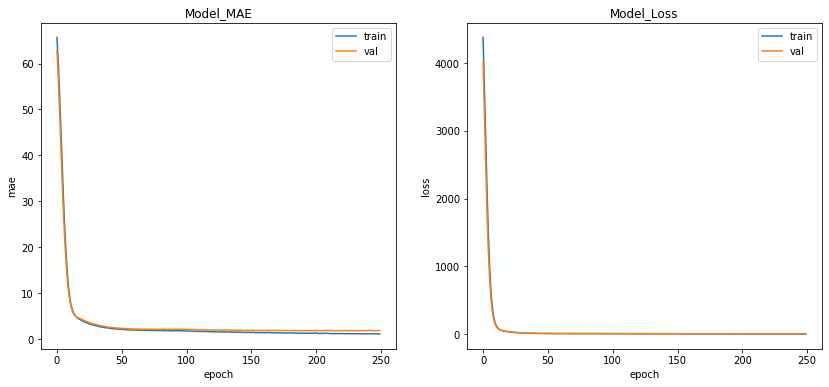

In [46]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model_MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

## 2nd model,Model with multiple layers and relu activation Function

In [47]:
def Multiple_layer_model():
    
    model = keras.Sequential([layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
        
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

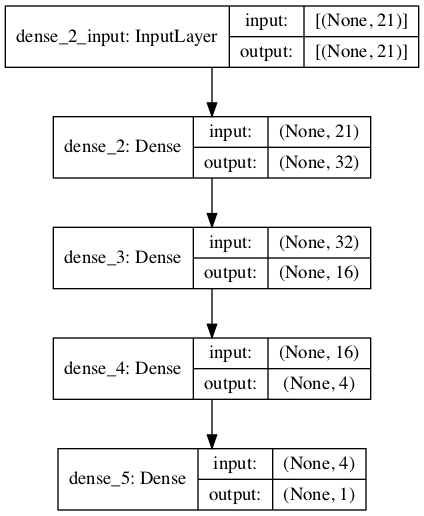

In [49]:
model = Multiple_layer_model()

tf.keras.utils.plot_model(model, show_shapes=True)

#None is the Batch Size not known ,21 is the Variables which we are using it for Training.

In [50]:
!rm -rf seq_logs

!ls -l

total 752
-rw-rw-r--@ 1 kumarnitish  staff   11328 Jun 15  2020 heart.csv
drwxr-xr-x  3 kumarnitish  staff      96 Jun 13 12:45 job_logs
-rw-rw-r--@ 1 kumarnitish  staff  333442 Jul  3  2020 life_expectancy.csv
drwxr-xr-x  3 kumarnitish  staff      96 Jun 13 12:42 logs
-rw-r--r--  1 kumarnitish  staff   32937 Jun 13 12:56 model.png


In [51]:
logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [52]:
training_history = model.fit(X_train, 
                             y_train, 
                             validation_split = 0.3, 
                             epochs = 400,
                             batch_size = 100,
                             callbacks = [tensorboard_callback])

Epoch 1/400
9/9 [==============================] - 1s 30ms/step - loss: 4776.9300 - mae: 68.6250 - mse: 4776.9300 - val_loss: 4765.9609 - val_mae: 68.4277 - val_mse: 4765.9609
Epoch 2/400
9/9 [==============================] - 0s 11ms/step - loss: 4753.6249 - mae: 68.4540 - mse: 4753.6249 - val_loss: 4714.3882 - val_mae: 68.0542 - val_mse: 4714.3882
Epoch 3/400
9/9 [==============================] - 0s 9ms/step - loss: 4710.7568 - mae: 68.1451 - mse: 4710.7569 - val_loss: 4649.7700 - val_mae: 67.5833 - val_mse: 4649.7700
Epoch 4/400
9/9 [==============================] - 0s 9ms/step - loss: 4642.1341 - mae: 67.6439 - mse: 4642.1341 - val_loss: 4567.6162 - val_mae: 66.9811 - val_mse: 4567.6162
Epoch 5/400
9/9 [==============================] - 0s 9ms/step - loss: 4514.9303 - mae: 66.6984 - mse: 4514.9303 - val_loss: 4462.9775 - val_mae: 66.2062 - val_mse: 4462.9775
Epoch 6/400
9/9 [==============================] - 0s 8ms/step - loss: 4423.8130 - mae: 66.0404 - mse: 4423.8131 - val_loss

9/9 [==============================] - 0s 8ms/step - loss: 93.8684 - mae: 7.6017 - mse: 93.8684 - val_loss: 122.2030 - val_mae: 8.6062 - val_mse: 122.2030
Epoch 49/400
9/9 [==============================] - 0s 7ms/step - loss: 92.2432 - mae: 7.5212 - mse: 92.2432 - val_loss: 121.2417 - val_mae: 8.5793 - val_mse: 121.2417
Epoch 50/400
9/9 [==============================] - 0s 8ms/step - loss: 89.1311 - mae: 7.3948 - mse: 89.1311 - val_loss: 120.1047 - val_mae: 8.5520 - val_mse: 120.1047
Epoch 51/400
9/9 [==============================] - 0s 8ms/step - loss: 88.2899 - mae: 7.3937 - mse: 88.2899 - val_loss: 118.3702 - val_mae: 8.4820 - val_mse: 118.3702
Epoch 52/400
9/9 [==============================] - 0s 8ms/step - loss: 89.2344 - mae: 7.3809 - mse: 89.2344 - val_loss: 116.4385 - val_mae: 8.3929 - val_mse: 116.4385
Epoch 53/400
9/9 [==============================] - 0s 7ms/step - loss: 91.9629 - mae: 7.4060 - mse: 91.9629 - val_loss: 115.0573 - val_mae: 8.3361 - val_mse: 115.0573
Epoch

9/9 [==============================] - 0s 8ms/step - loss: 48.3441 - mae: 5.4361 - mse: 48.3441 - val_loss: 72.5948 - val_mae: 6.5696 - val_mse: 72.5948
Epoch 98/400
9/9 [==============================] - 0s 7ms/step - loss: 48.4368 - mae: 5.3948 - mse: 48.4368 - val_loss: 71.8226 - val_mae: 6.5366 - val_mse: 71.8226
Epoch 99/400
9/9 [==============================] - 0s 8ms/step - loss: 47.9735 - mae: 5.3667 - mse: 47.9735 - val_loss: 71.2408 - val_mae: 6.5288 - val_mse: 71.2408
Epoch 100/400
9/9 [==============================] - 0s 8ms/step - loss: 48.0504 - mae: 5.3322 - mse: 48.0504 - val_loss: 70.6595 - val_mae: 6.4983 - val_mse: 70.6595
Epoch 101/400
9/9 [==============================] - 0s 9ms/step - loss: 48.5146 - mae: 5.3740 - mse: 48.5146 - val_loss: 70.3291 - val_mae: 6.4480 - val_mse: 70.3291
Epoch 102/400
9/9 [==============================] - 0s 15ms/step - loss: 44.2918 - mae: 5.1748 - mse: 44.2918 - val_loss: 69.4242 - val_mae: 6.4188 - val_mse: 69.4242
Epoch 103/400

9/9 [==============================] - 0s 7ms/step - loss: 28.6028 - mae: 4.0826 - mse: 28.6028 - val_loss: 46.7761 - val_mae: 5.2302 - val_mse: 46.7761
Epoch 147/400
9/9 [==============================] - 0s 8ms/step - loss: 26.7076 - mae: 4.0040 - mse: 26.7076 - val_loss: 46.1722 - val_mae: 5.2064 - val_mse: 46.1722
Epoch 148/400
9/9 [==============================] - 0s 8ms/step - loss: 27.5658 - mae: 4.0090 - mse: 27.5658 - val_loss: 45.5009 - val_mae: 5.1750 - val_mse: 45.5009
Epoch 149/400
9/9 [==============================] - 0s 8ms/step - loss: 27.9512 - mae: 4.1160 - mse: 27.9512 - val_loss: 45.2050 - val_mae: 5.1566 - val_mse: 45.2050
Epoch 150/400
9/9 [==============================] - 0s 8ms/step - loss: 27.8381 - mae: 4.0991 - mse: 27.8381 - val_loss: 45.0244 - val_mae: 5.1252 - val_mse: 45.0244
Epoch 151/400
9/9 [==============================] - 0s 8ms/step - loss: 27.5433 - mae: 4.0358 - mse: 27.5433 - val_loss: 44.8997 - val_mae: 5.1332 - val_mse: 44.8997
Epoch 152/40

9/9 [==============================] - 0s 7ms/step - loss: 19.9635 - mae: 3.4500 - mse: 19.9635 - val_loss: 32.7897 - val_mae: 4.3785 - val_mse: 32.7897
Epoch 196/400
9/9 [==============================] - 0s 8ms/step - loss: 20.4390 - mae: 3.4858 - mse: 20.4390 - val_loss: 32.4622 - val_mae: 4.3727 - val_mse: 32.4621
Epoch 197/400
9/9 [==============================] - 0s 8ms/step - loss: 19.8664 - mae: 3.4749 - mse: 19.8664 - val_loss: 32.3129 - val_mae: 4.3456 - val_mse: 32.3129
Epoch 198/400
9/9 [==============================] - 0s 8ms/step - loss: 20.0179 - mae: 3.4309 - mse: 20.0179 - val_loss: 32.3737 - val_mae: 4.3417 - val_mse: 32.3737
Epoch 199/400
9/9 [==============================] - 0s 8ms/step - loss: 18.9720 - mae: 3.3461 - mse: 18.9720 - val_loss: 31.9005 - val_mae: 4.3232 - val_mse: 31.9005
Epoch 200/400
9/9 [==============================] - 0s 8ms/step - loss: 18.2136 - mae: 3.3133 - mse: 18.2136 - val_loss: 31.7632 - val_mae: 4.2900 - val_mse: 31.7632
Epoch 201/40

9/9 [==============================] - 0s 9ms/step - loss: 13.8642 - mae: 2.8622 - mse: 13.8643 - val_loss: 23.9869 - val_mae: 3.6869 - val_mse: 23.9869
Epoch 245/400
9/9 [==============================] - 0s 7ms/step - loss: 15.5351 - mae: 2.9898 - mse: 15.5351 - val_loss: 24.0369 - val_mae: 3.7030 - val_mse: 24.0369
Epoch 246/400
9/9 [==============================] - 0s 8ms/step - loss: 14.6476 - mae: 2.9610 - mse: 14.6476 - val_loss: 24.1724 - val_mae: 3.7128 - val_mse: 24.1724
Epoch 247/400
9/9 [==============================] - 0s 7ms/step - loss: 14.7090 - mae: 2.9307 - mse: 14.7090 - val_loss: 23.3501 - val_mae: 3.6743 - val_mse: 23.3501
Epoch 248/400
9/9 [==============================] - 0s 8ms/step - loss: 14.5807 - mae: 2.9425 - mse: 14.5807 - val_loss: 22.9718 - val_mae: 3.6478 - val_mse: 22.9718
Epoch 249/400
9/9 [==============================] - 0s 8ms/step - loss: 14.7930 - mae: 2.9231 - mse: 14.7930 - val_loss: 23.0979 - val_mae: 3.6385 - val_mse: 23.0979
Epoch 250/40

9/9 [==============================] - 0s 8ms/step - loss: 11.5676 - mae: 2.6410 - mse: 11.5676 - val_loss: 19.1285 - val_mae: 3.2533 - val_mse: 19.1285
Epoch 294/400
9/9 [==============================] - 0s 8ms/step - loss: 10.5079 - mae: 2.5042 - mse: 10.5079 - val_loss: 19.2564 - val_mae: 3.2343 - val_mse: 19.2564
Epoch 295/400
9/9 [==============================] - 0s 8ms/step - loss: 11.5384 - mae: 2.6088 - mse: 11.5384 - val_loss: 19.0661 - val_mae: 3.2321 - val_mse: 19.0661
Epoch 296/400
9/9 [==============================] - 0s 8ms/step - loss: 10.4338 - mae: 2.4505 - mse: 10.4338 - val_loss: 19.0131 - val_mae: 3.2389 - val_mse: 19.0131
Epoch 297/400
9/9 [==============================] - 0s 8ms/step - loss: 10.5536 - mae: 2.4937 - mse: 10.5536 - val_loss: 18.6206 - val_mae: 3.1886 - val_mse: 18.6206
Epoch 298/400
9/9 [==============================] - 0s 8ms/step - loss: 10.5440 - mae: 2.5093 - mse: 10.5440 - val_loss: 18.4785 - val_mae: 3.1826 - val_mse: 18.4785
Epoch 299/40

9/9 [==============================] - 0s 7ms/step - loss: 8.4818 - mae: 2.2229 - mse: 8.4818 - val_loss: 16.9404 - val_mae: 2.9752 - val_mse: 16.9404
Epoch 343/400
9/9 [==============================] - 0s 8ms/step - loss: 8.9417 - mae: 2.2890 - mse: 8.9417 - val_loss: 16.9847 - val_mae: 2.9631 - val_mse: 16.9847
Epoch 344/400
9/9 [==============================] - 0s 8ms/step - loss: 8.6192 - mae: 2.2698 - mse: 8.6192 - val_loss: 16.4740 - val_mae: 2.9627 - val_mse: 16.4740
Epoch 345/400
9/9 [==============================] - 0s 8ms/step - loss: 8.9058 - mae: 2.2571 - mse: 8.9058 - val_loss: 16.4745 - val_mae: 2.9420 - val_mse: 16.4745
Epoch 346/400
9/9 [==============================] - 0s 8ms/step - loss: 9.1109 - mae: 2.3074 - mse: 9.1109 - val_loss: 16.4676 - val_mae: 2.9408 - val_mse: 16.4676
Epoch 347/400
9/9 [==============================] - 0s 8ms/step - loss: 7.8962 - mae: 2.1360 - mse: 7.8962 - val_loss: 16.6491 - val_mae: 2.9833 - val_mse: 16.6491
Epoch 348/400
9/9 [=====

Epoch 392/400
9/9 [==============================] - 0s 8ms/step - loss: 8.1901 - mae: 2.1551 - mse: 8.1901 - val_loss: 15.0446 - val_mae: 2.7399 - val_mse: 15.0446
Epoch 393/400
9/9 [==============================] - 0s 8ms/step - loss: 7.5680 - mae: 2.0946 - mse: 7.5680 - val_loss: 14.7658 - val_mae: 2.7604 - val_mse: 14.7658
Epoch 394/400
9/9 [==============================] - 0s 8ms/step - loss: 7.2302 - mae: 2.0376 - mse: 7.2302 - val_loss: 15.0316 - val_mae: 2.7676 - val_mse: 15.0316
Epoch 395/400
9/9 [==============================] - 0s 8ms/step - loss: 8.0678 - mae: 2.1899 - mse: 8.0678 - val_loss: 15.0060 - val_mae: 2.7546 - val_mse: 15.0060
Epoch 396/400
9/9 [==============================] - 0s 8ms/step - loss: 8.0680 - mae: 2.1380 - mse: 8.0680 - val_loss: 15.0447 - val_mae: 2.7867 - val_mse: 15.0447
Epoch 397/400
9/9 [==============================] - 0s 8ms/step - loss: 7.7194 - mae: 2.0641 - mse: 7.7194 - val_loss: 14.9097 - val_mae: 2.7436 - val_mse: 14.9097
Epoch 398/

In [53]:
%load_ext tensorboard

In [54]:
%tensorboard --logdir seq_logs --port 6500 

Reusing TensorBoard on port 6500 (pid 9696), started 0:57:21 ago. (Use '!kill 9696' to kill it.)

In [55]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 12.5301 - mae: 2.5038 - mse: 12.5301


[12.53013801574707, 2.5038018226623535, 12.53013801574707]

In [56]:
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.8445540753872867